In [1]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split    
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from RSData import *
from HaiYangData import *
from mpl_toolkits.basemap import Basemap
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sea_ice_model import * 

import graphviz
import pandas as pd
import numpy as np
import glob,os
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches



from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

C:\Users\user\AppData\Local\Temp/ipykernel_10900/1613307818.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
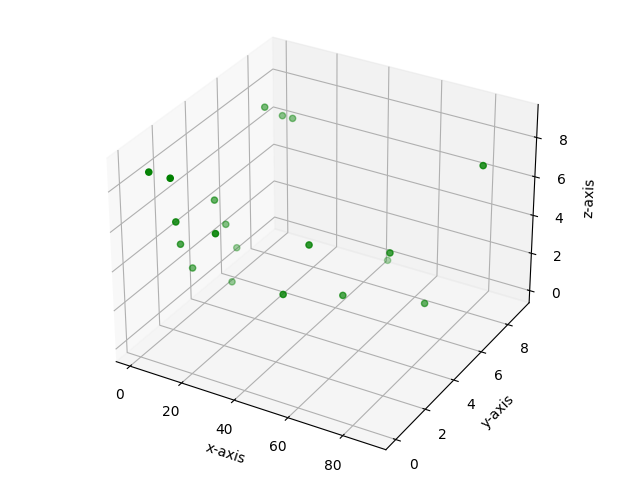

In [2]:
# creating 3d plot using matplotlib
# in python

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
	44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]

ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
	5, 2, 4, 1, 8, 7, 0, 5]

zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2,
	3, 4, 5, 6, 7, 8, 9, 0]

# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()


In [3]:
#数据切分, 按照7：3切分训练集与测试集
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']    
##  data_df：原始数据
##  object_col：目标变量

train_dir = r'e:\python_workfile\sea_ice_classification\\training6'

csv_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\polarization_ratio'
csv_files = glob.glob(csv_dir + '\*.csv')


In [4]:
save_path = r'D:\python_workfile\sea_ice_classification\training6\scatter_plot'

In [5]:

data = get_data_from_csv(csv_files)

process_sea_ice_train_dataframe(data)

In [6]:
data

,lon,lat,sig0_VV,sig0_HH,time,ice_type,VV+HH,VV-HH,polorization_ratio_1,polorization_ratio_2,week,day,month,year,year_month_str,julian_week,julian_day,quarter,quarter1,fyi_myi
0,-12.807700,74.052456,-11.980000,-11.810000,2019-05-14,3,-23.790000,-0.170000,0.007146,1.014395,19,134,5,2019,201905,0,0,2019Q2,2,0
1,-12.207693,74.076285,-12.630000,-11.700000,2019-05-14,2,-24.330000,-0.930000,0.038224,1.079487,19,134,5,2019,201905,0,0,2019Q2,2,0
2,-11.606271,74.098984,-13.540000,-13.850000,2019-05-14,2,-27.390000,0.310000,-0.011318,0.977617,19,134,5,2019,201905,0,0,2019Q2,2,0
3,-17.160834,74.071369,-12.230000,-11.570000,2019-05-14,4,-23.800000,-0.660000,0.027731,1.057044,19,134,5,2019,201905,0,0,2019Q2,2,1
4,-16.566100,74.103424,-11.410000,-11.280000,2019-05-14,4,-22.690000,-0.130000,0.005729,1.011525,19,134,5,2019,201905,0,0,2019Q2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19665,-168.622506,66.498740,-15.996667,-15.863333,2021-04-13,3,-31.860000,-0.133333,0.004185,1.008405,15,103,4,2021,202104,100,700,2021Q2,2,0
19666,-168.868682,66.539381,-15.866667,-15.483333,2021-04-13,3,-31.350000,-0.383333,0.012228,1.024758,15,103,4,2021,202104,100,700,2021Q2,2,0
19667,-169.116086,66.579136,-16.110000,-15.246667,2021-04-13,3,-31.356667,-0.863333,0.027533,1.056624,15,103,4,2021,202104,100,700,2021Q2,2,0
19668,-168.520643,66.241208,-14.756667,-14.836667,2021-04-13,3,-29.593333,0.080000,-0.002703,0.994608,15,103,4,2021,202104,100,700,2021Q2,2,0


In [7]:
# 绘制
data['VV+HH'] = data['sig0_VV'] +data['sig0_HH'] 

data['VV-HH'] = data['sig0_VV'] -data['sig0_HH'] 


mean_VV_add_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['VV+HH']

mean_VV_sub_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['VV-HH']

icetype_two_polor_df = pd.merge(mean_VV_add_HH,mean_VV_sub_HH,on=['year_month_str','ice_type'])

icetype_two_polor_df.columns = ['VV+HH','VV-HH']

icetype_two_polor_df = icetype_two_polor_df.reset_index(level=1)

In [8]:
# 准备VV，HH，极化比三项的数据
mean_sig0_VV = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_VV']
mean_sig0_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_HH']

mean_polorization_ratio_1  = data.groupby([data['year_month_str'],data['ice_type']]).mean()['polorization_ratio_1']


icetype_three_polor_df = pd.merge(mean_sig0_VV,mean_sig0_HH,on=['year_month_str','ice_type'])

icetype_three_polor_df = pd.merge(icetype_three_polor_df,mean_polorization_ratio_1,on=['year_month_str','ice_type'])

icetype_three_polor_df.columns = ['sig0_VV','sig0_HH','polorization_ratio_1']

icetype_three_polor_df = icetype_three_polor_df.reset_index(level=1)

In [9]:
color_l = ['r','b','g','m','black']
FI = mpatches.Patch(color='black', label='Fast Ice')
OI = mpatches.Patch(color='m', label='Old Ice')
FYI = mpatches.Patch(color='g', label='First Year Ice')
YI = mpatches.Patch(color='b', label='Young Ice')
N = mpatches.Patch(color='r', label='Nilas')


C:\Users\user\AppData\Local\Temp/ipykernel_10900/1376731306.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
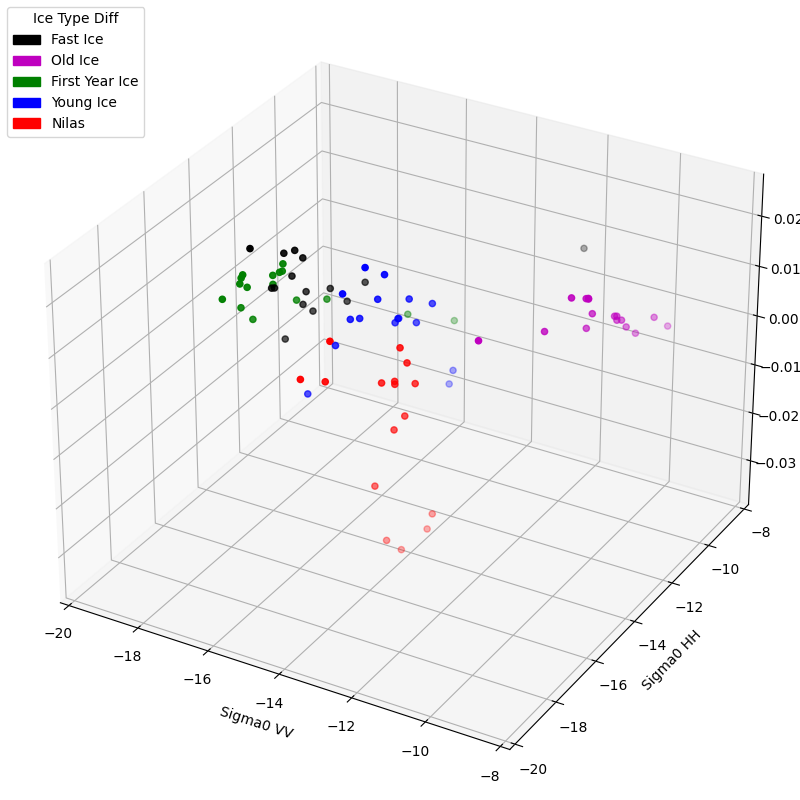

In [10]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for index in range(1,6):
    
    ax.scatter(icetype_three_polor_df[icetype_three_polor_df['ice_type']==index]['sig0_VV'],
               icetype_three_polor_df[icetype_three_polor_df['ice_type']==index]['sig0_HH'],
               icetype_three_polor_df[icetype_three_polor_df['ice_type']==index]['polorization_ratio_1'],c = color_l[index-1])
ax.set_xticks(np.arange(-20,-7,2))
ax.set_yticks(np.arange(-20,-7,2))
ax.set_zticks(np.arange(-0.03,0.03,0.01))
ax.set_xlabel('Sigma0 VV')
ax.set_ylabel('Sigma0 HH')
ax.set_zlabel('Polorization Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.title('VV  HH  Polorization Ratio 3D Scatter Polt')
plt.show()
# plt.savefig(r'E:\python_workfile\sea_ice_classification\training6\scatter_plot'+'\\'+'VV_HH_polar_ratio3D')


In [12]:
# 准备VV，VV/HH,VV-HH/VV+HH数据
mean_polorization_ratio_2  = data.groupby([data['year_month_str'],data['ice_type']]).mean()['polorization_ratio_2']
mean_lat = data.groupby([data['year_month_str'],data['ice_type']]).mean()['lat']
mean_lon = data.groupby([data['year_month_str'],data['ice_type']]).mean()['lon']

VV_p1_p2_df = pd.merge(mean_sig0_VV,mean_polorization_ratio_2,on=['year_month_str','ice_type'])

VV_p1_p2_df = pd.merge(VV_p1_p2_df,mean_polorization_ratio_1,on=['year_month_str','ice_type'])

VV_p1_p2_df.columns = ['sig0_VV','polorization_ratio_2','polorization_ratio_1']

VV_p1_p2_df = VV_p1_p2_df.reset_index(level=1)

In [18]:
# lat,lon,VV/HH
lat_lon_p2_df = pd.merge(mean_lat,mean_lon,on=['year_month_str','ice_type'])
lat_lon_p2_df = pd.merge(lat_lon_p2_df,mean_polorization_ratio_2,on=['year_month_str','ice_type'])

lat_lon_p2_df.columns = ['lat','lon','polorization_ratio_2']
lat_lon_p2_df = lat_lon_p2_df.reset_index(level=1)



C:\Users\user\AppData\Local\Temp/ipykernel_7532/4170416611.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


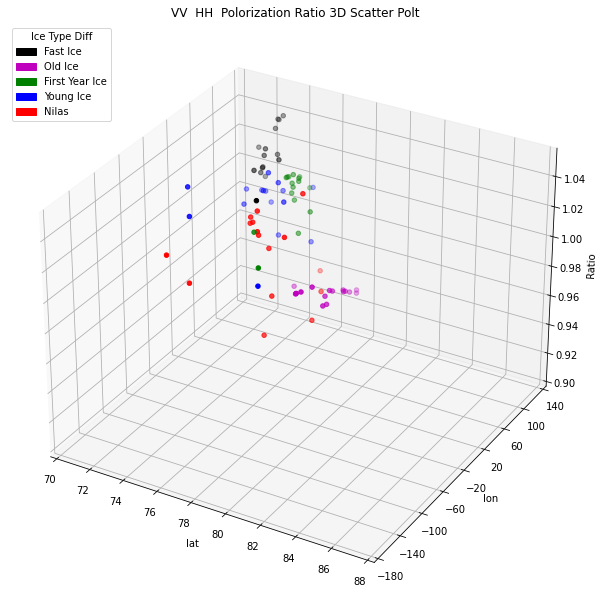

In [25]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for index in range(1,6):
    
    ax.scatter(lat_lon_p2_df[lat_lon_p2_df['ice_type']==index]['lat'],
               lat_lon_p2_df[lat_lon_p2_df['ice_type']==index]['lon'],
               lat_lon_p2_df[lat_lon_p2_df['ice_type']==index]['polorization_ratio_2'],c = color_l[index-1])
ax.set_xticks(np.arange(70,90,2))
ax.set_yticks(np.arange(-180,180,40))
ax.set_zticks(np.arange(0.9,1.05,0.02))
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.title('VV  HH  Polorization Ratio 3D Scatter Polt')
plt.savefig(r'E:\python_workfile\sea_ice_classification\training6\scatter_plot'+'\\'+'lat_lon_ratio3D')


C:\Users\user\AppData\Local\Temp/ipykernel_7532/3202524850.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


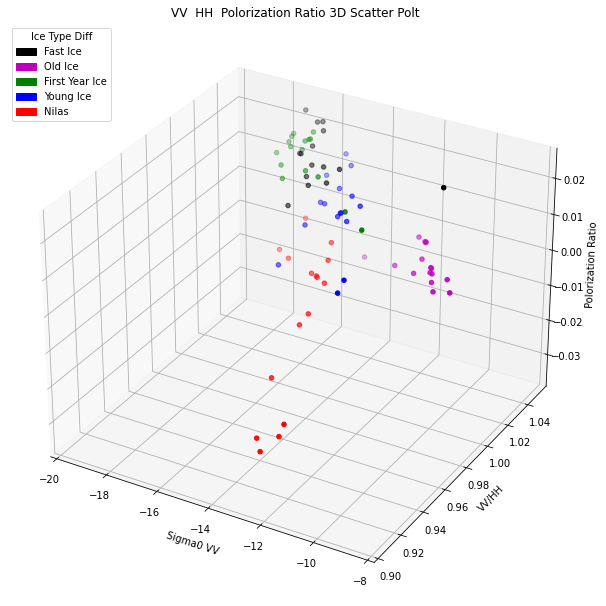

In [17]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for index in range(1,6):
    
    ax.scatter(VV_p1_p2_df[VV_p1_p2_df['ice_type']==index]['sig0_VV'],
               VV_p1_p2_df[VV_p1_p2_df['ice_type']==index]['polorization_ratio_2'],
               VV_p1_p2_df[VV_p1_p2_df['ice_type']==index]['polorization_ratio_1'],c = color_l[index-1])
ax.set_xticks(np.arange(-20,-7,2))
ax.set_yticks(np.arange(0.9,1.05,0.02))
ax.set_zticks(np.arange(-0.03,0.03,0.01))
ax.set_xlabel('Sigma0 VV')
ax.set_ylabel('VV/HH')
ax.set_zlabel('Polorization Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.title('VV  HH  Polorization Ratio 3D Scatter Polt')
plt.savefig(r'E:\python_workfile\sea_ice_classification\training6\scatter_plot'+'\\'+'VV_ratio_polar_ratio3D')


In [19]:

lat_lon_p1_df = pd.merge(mean_lat,mean_lon,on=['year_month_str','ice_type'])
lat_lon_p1_df = pd.merge(lat_lon_p1_df,mean_polorization_ratio_1,on=['year_month_str','ice_type'])

lat_lon_p1_df.columns = ['lat','lon','polorization_ratio_1']
lat_lon_p1_df = lat_lon_p1_df.reset_index(level=1)

C:\Users\user\AppData\Local\Temp/ipykernel_7532/2834074763.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


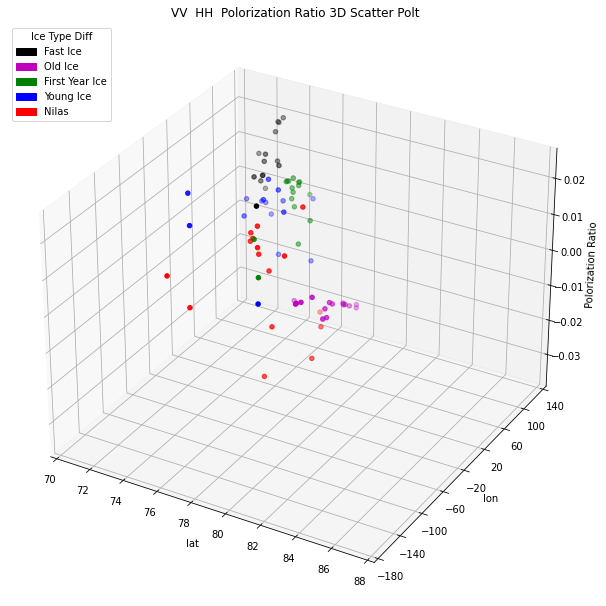

In [24]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)

for index in range(1,6):
    
    ax.scatter(lat_lon_p1_df[lat_lon_p1_df['ice_type']==index]['lat'],
               lat_lon_p1_df[lat_lon_p1_df['ice_type']==index]['lon'],
               lat_lon_p1_df[lat_lon_p1_df['ice_type']==index]['polorization_ratio_1'],c = color_l[index-1])
ax.set_xticks(np.arange(70,90,2))
ax.set_yticks(np.arange(-180,180,40))
ax.set_zticks(np.arange(-0.03,0.03,0.01))
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('Polorization Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.title('VV  HH  Polorization Ratio 3D Scatter Polt')
plt.savefig(r'E:\python_workfile\sea_ice_classification\training6\scatter_plot'+'\\'+'lat_lon_polar_ratio3D')


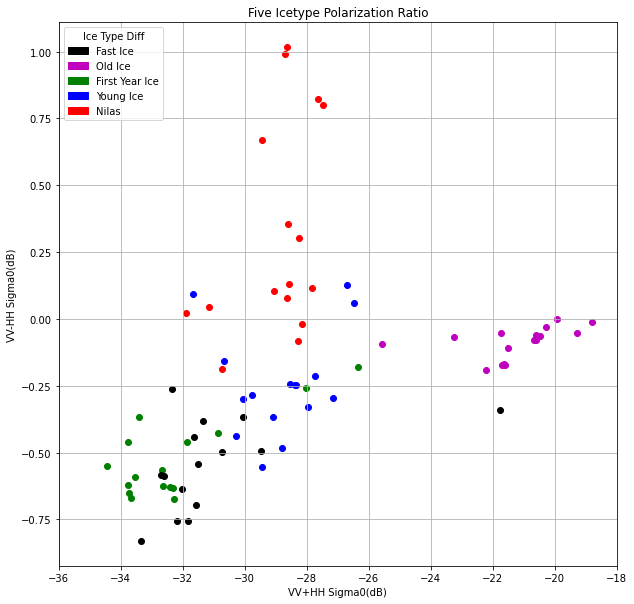

In [8]:
# 画极化比散点图
fig =plt.figure(figsize=(10,10))

plt.xlabel('VV+HH Sigma0(dB)')
plt.ylabel('VV-HH Sigma0(dB)')
for index in range(1,6):
    
    plt.scatter(icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['VV+HH'],icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['VV-HH'],c = color_l[index-1])
    
    plt.xticks(np.arange(-36,-16,2))
    plt.yticks(np.arange(-0.75,1.25,0.25))
# x = np.linspace(-20,-5,100)
# y=x
# plt.plot(x,y,'-r')
plt.title('Five Icetype Polarization Ratio')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.grid()
plt.savefig(save_path + r'\\icetype_VV_HH_polar_ratio.png')
plt.show()

In [9]:


mean_VV = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_VV']

mean_HH = data.groupby([data['year_month_str'],data['ice_type']]).mean()['sig0_HH']

icetype_two_polor_df = pd.merge(mean_VV,mean_HH,on=['year_month_str','ice_type'])

icetype_two_polor_df.columns = ['sig0_VV','sig0_HH']

icetype_two_polor_df = icetype_two_polor_df.reset_index(level=1)

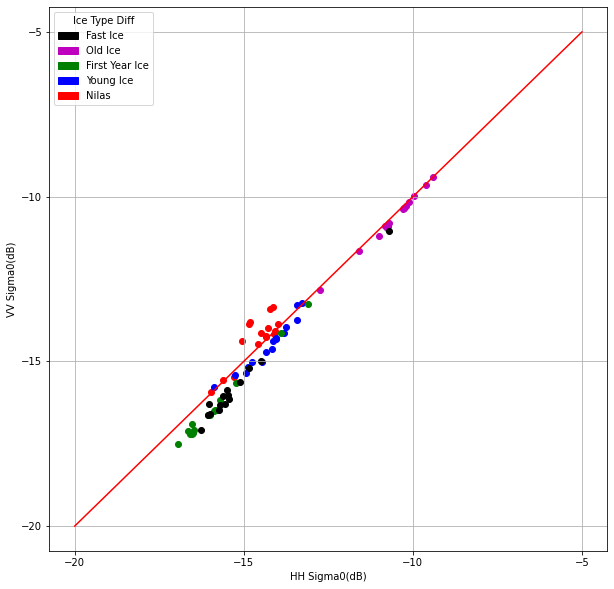

In [13]:
# 画月均后向散射系数散点图
fig =plt.figure(figsize=(10,10))

plt.xlabel('HH Sigma0(dB)')
plt.ylabel('VV Sigma0(dB)')
for index in range(1,6):
    
    plt.scatter(icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['sig0_HH'],icetype_two_polor_df[icetype_two_polor_df['ice_type']==index]['sig0_VV'],c = color_l[index-1])
    
    plt.xticks(np.arange(-20,-4.9,5))
    plt.yticks(np.arange(-20,-4.9,5))
x = np.linspace(-20,-5,100)
y=x
plt.plot(x,y,'-r')
plt.legend(loc='upper left',handles=[FI,OI ,FYI, YI ,N], title='Ice Type Diff')
plt.grid()
# plt.savefig('icetype_VV_HH_sig0.png')
plt.show()

In [16]:
icetype_two_polor_df[icetype_two_polor_df['ice_type']==5]

,ice_type,sig0_VV,sig0_HH
year_month_str,,,
201905,5,-16.297480,-16.036655
201911,5,-16.642074,-16.058820
201912,5,-16.019036,-15.476212
202001,5,-16.600275,-16.012843
202002,5,-16.327323,-15.692630
202003,5,-16.044713,-15.601078
202004,5,-15.868164,-15.486507
202005,5,-15.214937,-14.847927
202010,5,-11.055067,-10.714088
